# Modeling a single population

In [1]:
r <- 1
s <- 0
dt <- 1
t <- 0
N <- 3
timeSteps <- 14
population <- data.frame(time = integer(), exponential = integer())

for(i in 1:timeSteps) {
  population[i, ] = c(t, N)
  dN <- (r + s * N) * N * dt
  N <- N + dN
  t <- t + dt
  
}
population

,time,exponential
,<dbl>,<dbl>
1,0,3
2,1,6
3,2,12
4,3,24
5,4,48
6,5,96
7,6,192
8,7,384
9,8,768


Orthologistic:

In [2]:
N <- 3      # re-initialize population size
t <- 0
s <- 0.05   # note: s has changed and the other values are the same

for(i in 1:timeSteps)
{
  population[i, "orthologistic"] <- N
  dN <- (r + s * N) * N * dt
  N <- N + dN
  t <- t + dt
}
population[,c("time", "orthologistic")]

,time,orthologistic
,<dbl>,<dbl>
1,0,3.000000e+00
2,1,6.450000e+00
3,2,1.498012e+01
4,3,4.118046e+01
5,4,1.671524e+02
6,5,1.731301e+03
7,6,1.533328e+05
8,7,1.175854e+09
9,8,6.913168e+16


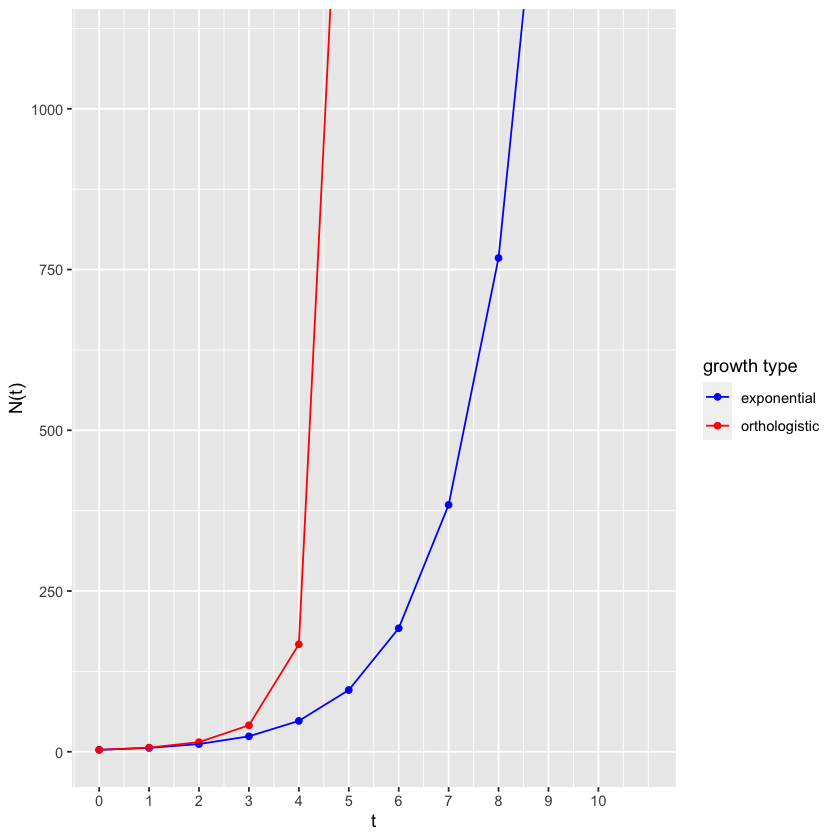

In [3]:
suppressPackageStartupMessages(library(tidyverse))
pivot_longer(population, !time, names_to = "growth type", values_to = "N") %>%
  ggplot(aes(x=time, y=N, color=`growth type`)) + geom_point() + geom_line() + 
  coord_cartesian(ylim=c(0, 1100), xlim=c(0,11)) + #limits of x and y axis, allows for out of bounds line
  scale_color_manual(values = c("blue", "red")) +
  xlab("t") + #label for x axis
  ylab("N(t)") + #label for y axis
  scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) + #tick labels for x axis
  scale_y_continuous(breaks=c(0,250,500,750,1000)) #tick labels for y axis

In [4]:
r <- 1
s <- -0.001
dt <- 1
t <- 0
N <- 3


for(i in 1:timeSteps)
{
  population[i, "logistic"] <- N
  dN <- (r + s * N) * N * dt
  N <- N + dN
  t <- t + dt
}
population[,c("time", "logistic")]

,time,logistic
,<dbl>,<dbl>
1,0,3.00000
2,1,5.99100
3,2,11.94611
4,3,23.74951
5,4,46.93497
6,5,91.66706
7,6,174.93126
8,7,319.26158
9,8,536.59520


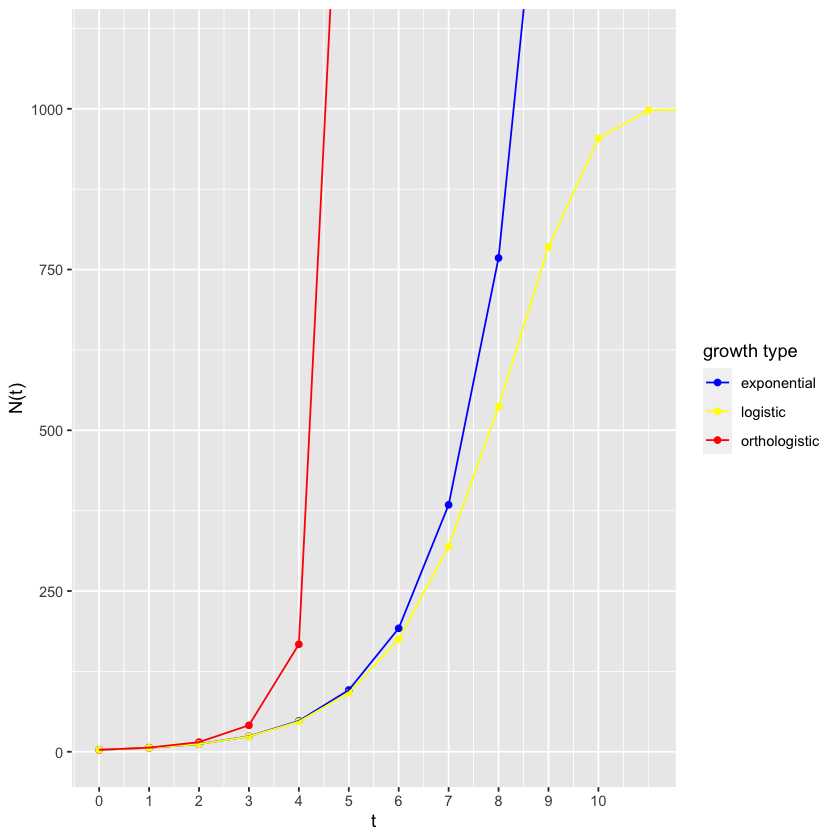

In [5]:
pivot_longer(population, !time, names_to = "growth type", values_to = "N") %>%
  ggplot(aes(x=time, y=N, color=`growth type`)) + geom_point() + geom_line() + 
  coord_cartesian(ylim=c(0, 1100), xlim=c(0,11)) + #limits of x and y axis, allows for out of bounds line
  scale_color_manual(values = c("blue", "yellow","red")) +
  xlab("t") + #label for x axis
  ylab("N(t)") + #label for y axis
  scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) + #tick labels for x axis
  scale_y_continuous(breaks=c(0,250,500,750,1000)) #tick labels for y axis